In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from astropy.table import Table
from scipy import stats
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
os.chdir(r'../Data')

Data reading with astropy

In [3]:
Table.read('Query.csv', format='ascii')

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.07881416118313611,0.40713978900718306,-0.06330399501307094,0.43317660097754307,0.30411141418415494,0.21791510153279095,0.5888151998171891,0.43475736447011015,3670768.8,3.386793e-05,139429577000.0,128357564000.0,83765552.0
2,0.14115086845045632,0.45540397013578027,0.0016069357965954323,0.4194418575486196,0.3541853068777756,0.260477842965525,0.7316657343093015,0.26345891923277237,3599950.0,7.31597e-09,132794966000.0,121664340000.0,127600848.0
3,0.21260189713746824,0.4947171208411709,0.047972205596559125,0.4290507323475813,0.38789562992127,0.3105566731992107,0.848138163395796,0.21089581822901327,3558926.5,3.8772018e-07,122170941000.0,110975549000.0,201059248.0
4,0.19453083963799633,0.4001068760843328,-0.23217451890708873,0.43591737769213323,0.26111867073700684,0.19435070012723712,0.5245062215512457,0.1979126388916081,3501025.5,1.8196057e-05,203993760000.0,192370328000.0,346410720.0
5,0.22110837478846934,0.0021029095221080096,-0.2734711525572815,0.4713208681569664,0.14222777645385312,0.01194960946415184,0.00190359071071751,0.040310453332101294,3331357.2,0.0001642653,191415550000.0,179377750000.0,843632830.0
6,0.24307254165203662,0.1886542127069395,-0.17955189341659183,0.44761544093734784,0.21045125474426346,0.07785426105326988,0.1860235372118975,0.3144862712043965,2976699.5,9.0003704e-07,151063331000.0,138421027000.0,2169467140.0
7,0.3355855347361052,0.43972802244261655,-0.24839833773468056,0.4054807301363227,0.2748705390874355,0.20586499651581155,0.5258432463928291,0.2536484192907611,2965977.8,4.8014922e-08,234519298000.0,219688534000.0,4707850800.0
8,0.3622733943958599,0.5155763341538696,0.02527457445758463,0.36123460990013156,0.3924876888834857,0.3073785995679593,0.8345391196856949,0.19678504479839135,3083270.0,1.5243896e-06,325848891000.0,308000719000.0,8252066800.0
9,0.361990793939168,0.4603353892148281,-0.29378437052182305,0.41274800630732134,0.2841291114545444,0.21566276368815396,0.5932924599354679,0.1696249284806182,2714422.0,1.381053e-05,306855248000.0,287110300000.0,10776853500.0


Naming table

In [4]:
t=Table.read('Query.csv', format='ascii')

Turning table to a pandas' dataframe

In [5]:
df = t.to_pandas()
df

,GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
0,1,0.078814,0.407140,-0.063304,0.433177,0.304111,0.217915,0.588815,0.434757,3670768.80,3.386793e-05,1.394296e+11,1.283576e+11,83765552.0
1,2,0.141151,0.455404,0.001607,0.419442,0.354185,0.260478,0.731666,0.263459,3599950.00,7.315970e-09,1.327950e+11,1.216643e+11,127600848.0
2,3,0.212602,0.494717,0.047972,0.429051,0.387896,0.310557,0.848138,0.210896,3558926.50,3.877202e-07,1.221709e+11,1.109755e+11,201059248.0
3,4,0.194531,0.400107,-0.232175,0.435917,0.261119,0.194351,0.524506,0.197913,3501025.50,1.819606e-05,2.039938e+11,1.923703e+11,346410720.0
4,5,0.221108,0.002103,-0.273471,0.471321,0.142228,0.011950,0.001904,0.040310,3331357.20,1.642653e-04,1.914156e+11,1.793778e+11,843632830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,447839,0.425048,0.118257,0.287787,0.505563,0.168130,0.071755,0.113385,0.538363,151795.84,4.693862e-11,3.501969e+10,3.465130e+10,324556672.0
15582,447840,0.423208,0.118191,0.256377,0.521638,0.225110,0.106045,0.166303,0.708379,151746.88,1.535701e-10,3.382889e+10,3.343821e+10,348297408.0
15583,448916,0.350888,0.111116,-0.050673,0.351533,0.180507,0.083108,0.149036,0.943685,148212.00,7.861806e-10,3.683292e+10,3.600740e+10,775508160.0
15584,448917,0.360480,0.113065,0.027423,0.377660,0.204416,0.049646,0.096367,0.972778,148208.75,1.246126e-10,3.481568e+10,3.403810e+10,729236800.0


Cheking the dataframe (df) created 

In [6]:
df.describe()

,GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
count,1.558600e+04,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,1.558600e+04,1.558600e+04,1.558600e+04,1.558600e+04,1.558600e+04
mean,1.537223e+06,0.386919,0.238464,0.217904,0.507991,0.272815,0.156356,0.332197,0.597743,1.676262e+06,2.667496e-04,1.511883e+11,1.403583e+11,8.864924e+09
std,2.059825e+06,0.124214,0.175288,0.269966,0.137366,0.109870,0.143231,0.338826,0.262046,1.191951e+07,9.038365e-03,4.993767e+11,4.604036e+11,3.491294e+10
min,1.000000e+00,0.025403,-0.651834,-2.094432,0.035254,0.070846,-0.514682,0.000090,0.002863,0.000000e+00,0.000000e+00,4.391130e+08,3.708355e+08,0.000000e+00
25%,2.875302e+05,0.300046,0.108939,0.069627,0.423687,0.192942,0.058242,0.121219,0.399034,1.477211e+05,2.104634e-12,2.583313e+10,2.389617e+10,1.050555e+09
50%,8.274655e+05,0.392914,0.196809,0.258686,0.523712,0.238095,0.111648,0.224273,0.655290,1.505738e+05,5.304515e-11,4.953519e+10,4.621992e+10,2.865444e+09
75%,1.498108e+06,0.476209,0.335810,0.413363,0.609322,0.324826,0.208289,0.416636,0.818219,2.990465e+05,2.028050e-09,9.993667e+10,9.262829e+10,6.520260e+09
max,7.147411e+06,0.789305,0.861619,0.847404,0.884760,0.770102,0.875559,3.402193,0.997937,3.604136e+08,8.859110e-01,1.557871e+13,1.420442e+13,1.262470e+12


It is eliminated the data with values bellow cero 

In [7]:
df=df.drop(df[df['DiscToTotal']<0].index)
df=df.drop(df[df['KappaCoRot']<0].index)
df=df.drop(df[df['MedOrbitCircu']<0].index)

Calculating the spearman rank-order coefficients

In [8]:
df.corr(method='spearman')

,GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
GalaxyID,1.000000,-0.078173,-0.021054,-0.191373,-0.156186,-0.060589,-0.033798,-0.016480,0.013643,-0.032832,-0.073180,-0.207172,-0.214830,-0.071297
DMEllipticity,-0.078173,1.000000,-0.190926,0.155280,0.530480,-0.229670,-0.246382,-0.229388,0.393822,0.046391,0.045387,0.225877,0.224250,0.280452
DiscToTotal,-0.021054,-0.190926,1.000000,0.326920,0.263531,0.855512,0.957429,0.982182,-0.431586,0.217453,0.158145,0.236307,0.225222,0.322969
DispAnisotropy,-0.191373,0.155280,0.326920,1.000000,0.527238,0.536476,0.383966,0.316322,-0.211367,0.108961,0.063310,0.177271,0.175723,0.177382
Ellipticity,-0.156186,0.530480,0.263531,0.527238,1.000000,0.238303,0.252019,0.216686,0.136130,0.171122,0.129109,0.310763,0.305754,0.363682
KappaCoRot,-0.060589,-0.229670,0.855512,0.536476,0.238303,1.000000,0.865516,0.881315,-0.581592,0.244288,0.171346,0.270742,0.261518,0.320308
MedOrbitCircu,-0.033798,-0.246382,0.957429,0.383966,0.252019,0.865516,1.000000,0.965742,-0.482550,0.157923,0.122811,0.137046,0.128260,0.206278
RotToDispRatio,-0.016480,-0.229388,0.982182,0.316322,0.216686,0.881315,0.965742,1.000000,-0.486941,0.212851,0.153181,0.223618,0.212948,0.302490
Triaxiality,0.013643,0.393822,-0.431586,-0.211367,0.136130,-0.581592,-0.482550,-0.486941,1.000000,-0.181801,-0.148416,-0.132726,-0.131172,-0.090784
MasaANegro,-0.032832,0.046391,0.217453,0.108961,0.171122,0.244288,0.157923,0.212851,-0.181801,1.000000,0.532694,0.643458,0.639913,0.564539


Setting seaborn style

In [9]:
sns.set()
sns.set_style("white")

Defining histograms

In [25]:
bins_ytotal = np.linspace(0, 1, 41)
bins_xtotal = np.linspace(0, 3.5, 41)


#For DiscToTotal
Hnumber1, _, yedges_dt = np.histogram2d(df['RotToDispRatio'], df['DiscToTotal'],
                                          bins=(bins_xtotal,bins_ytotal))
Hnumber1[Hnumber1 <= 3.0] = np.nan #Coloring only the cells with more than 3 galaxies

#For KappaCoRot
Hnumber2, xedges, yedges_kco = np.histogram2d(df['RotToDispRatio'], df['KappaCoRot'], bins=(bins_xtotal,bins_ytotal))
Hnumber2[Hnumber2 <= 3.0] = np.nan #Coloring only the cells with more than 3 galaxies

#For MedOrbitCircu
Hnumber3, xedges, yedges_mor = np.histogram2d(df['RotToDispRatio'], df['MedOrbitCircu'], bins=(bins_xtotal,bins_ytotal))
Hnumber3[Hnumber3 <= 3.0] = np.nan #Coloring only the cells with more than 3 galaxies

Defining percentiles and mean for each case

In [33]:
def per_16(array):
    """Percentile at 16th"""
    return np.nanpercentile(array, 16)

def per_84(array):
    """Percentile at 84th"""
    return np.nanpercentile(array, 84)

#For DiscToTotal
means1, edges, numbers = stats.binned_statistic(df['DiscToTotal'], df['RotToDispRatio'], bins=20)
means1_16, edges, numbers = stats.binned_statistic(df['DiscToTotal'], df['RotToDispRatio'], bins=20, statistic=per_16)
means1_84, edges_dt, numbers = stats.binned_statistic(df['DiscToTotal'], df['RotToDispRatio'], bins=20, statistic=per_84)
#For KappaCoRot
means2, edges, numbers = stats.binned_statistic(df['KappaCoRot'], df['RotToDispRatio'], bins=20)
means2_16, edges, numbers = stats.binned_statistic(df['KappaCoRot'], df['RotToDispRatio'], bins=20, statistic=per_16)
means2_84, edges_kco, numbers = stats.binned_statistic(df['KappaCoRot'], df['RotToDispRatio'], bins=20, statistic=per_84)
#For MedOrbitCircu
means3, edges, numbers = stats.binned_statistic(df['MedOrbitCircu'], df['RotToDispRatio'], bins=20)
means3_16, edges, numbers = stats.binned_statistic(df['MedOrbitCircu'], df['RotToDispRatio'], bins=20, statistic=per_16)
means3_84, edges_mor, numbers = stats.binned_statistic(df['MedOrbitCircu'], df['RotToDispRatio'], bins=20, statistic=per_84)




Plotting all subplots

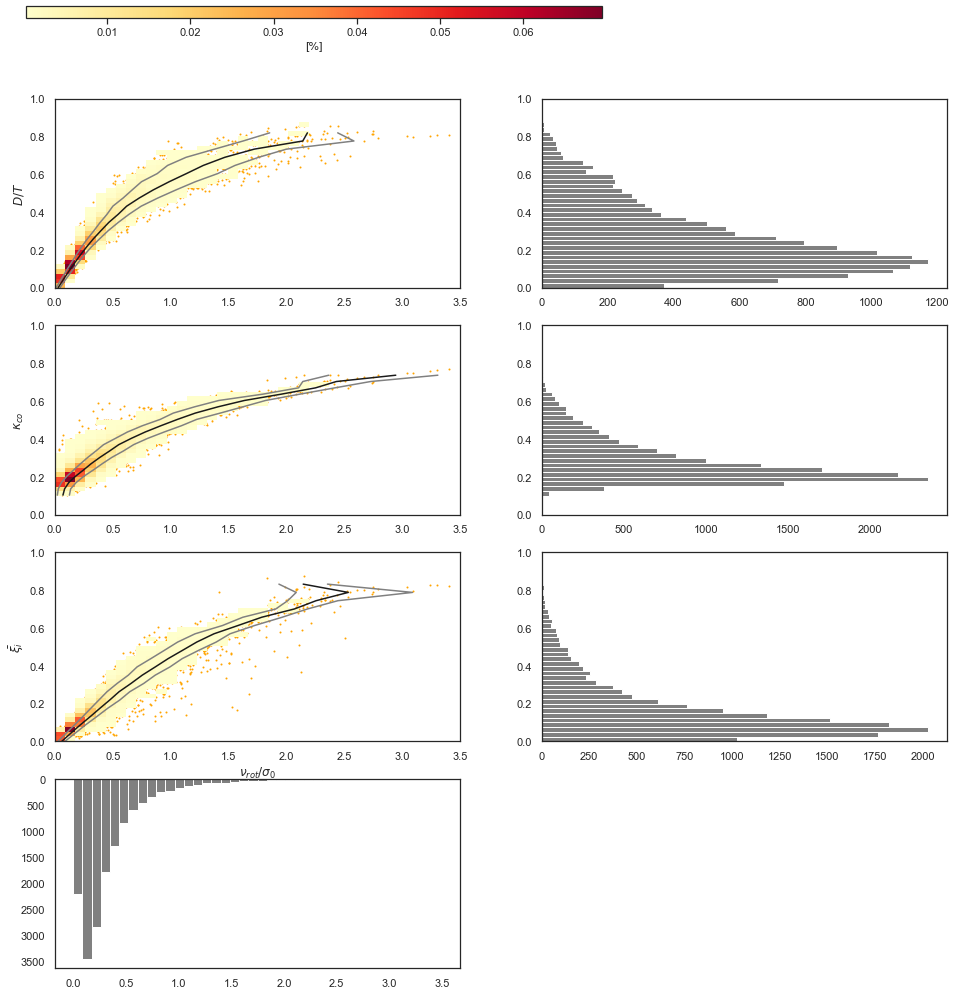

In [35]:
fig= plt.figure(figsize=(16,16), facecolor= 'white')

#DiscToTotal
ax1=fig.add_subplot(4,2,1)
plt.scatter(df['RotToDispRatio'], df['DiscToTotal'], c='Orange', s=1)       #Scattering
mapa1 = plt.imshow(Hnumber1.T/np.nansum(Hnumber1), interpolation='None', origin='lower', cmap='YlOrRd',
                   extent=[xedges[0], xedges[-1], yedges_dt[0], yedges_dt[-1]], zorder=1)
plt.plot(means1, edges_dt[:-1], c='k')
plt.plot(means1_16, edges_dt[:-1], c='gray')
plt.plot(means1_84, edges_dt[:-1], c='gray')
ax1.set_ylabel(r'$D/T$')

cbaxes = fig.add_axes([0.1, 0.95, 0.5, 0.01])        #Colorbar
plt.colorbar(mapa1, ax=ax1, cax = cbaxes, orientation="horizontal", label='[%]')
ax1.set_aspect('auto')

ax2=fig.add_subplot(4,2,2, sharey = ax1)
plt.hist(df['DiscToTotal'], bins = bins_ytotal, orientation='horizontal', color='gray')

#KappaCoRot
ax3=fig.add_subplot(4,2,3, sharex = ax1)
plt.scatter(x=df['RotToDispRatio'], y=df['KappaCoRot'], c='Orange', s=1)       #Scattering
mapa2 = plt.imshow(Hnumber2.T/np.nansum(Hnumber2), interpolation='None', origin='lower', cmap='YlOrRd',
                   extent=[xedges[0], xedges[-1], yedges_kco[0], yedges_kco[-1]], zorder=1)
ax3.set_ylabel(r'$\kappa_{co}$')
ax3.set_aspect('auto')
plt.plot(means2, edges_kco[:-1], c='k')
plt.plot(means2_16, edges_kco[:-1], c='gray')
plt.plot(means2_84, edges_kco[:-1], c='gray')

ax4=fig.add_subplot(4,2,4, sharey = ax3)
plt.hist(df['KappaCoRot'], bins = bins_ytotal, orientation='horizontal', color='gray')

#MedOrbitCircu
ax5=fig.add_subplot(4,2,5, sharex = ax1)
plt.scatter(df['RotToDispRatio'], df['MedOrbitCircu'], c='Orange', s=1)       #Scattering
mapa3 = plt.imshow(Hnumber3.T/np.nansum(Hnumber3), interpolation='None', origin='lower', cmap='YlOrRd',
                   extent=[xedges[0], xedges[-1], yedges_mor[0], yedges_mor[-1]], zorder=1)
ax5.set_ylabel(r'$\bar{\xi_i}$')
ax5.set_xlabel(r'$\nu_{rot}/\sigma_0$')
ax5.set_aspect('auto')
plt.plot(means3, edges_mor[:-1], c='k')
plt.plot(means3_16, edges_mor[:-1], c='gray')
plt.plot(means3_84, edges_mor[:-1], c='gray')

ax6=fig.add_subplot(4,2,6, sharey = ax5)
plt.hist(df['MedOrbitCircu'], bins = bins_ytotal, orientation='horizontal', color='gray')

ax7=fig.add_subplot(4,2,7)
plt.hist(df['RotToDispRatio'], bins = xedges, color='gray')
ax7.invert_yaxis()

Changing directory to location where I want to store the graphics

In [36]:
os.chdir(r'../Analysis')
fig.savefig('Figure1.png')